In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager
sorted([font.name for font in font_manager.fontManager.ttflist])

['.Aqua Kana',
 '.Keyboard',
 '.New York',
 '.New York',
 '.SF Arabic',
 '.SF Arabic Rounded',
 '.SF Armenian',
 '.SF Armenian Rounded',
 '.SF Camera',
 '.SF Compact',
 '.SF Compact',
 '.SF Compact Rounded',
 '.SF Georgian',
 '.SF Georgian Rounded',
 '.SF Hebrew',
 '.SF Hebrew Rounded',
 '.SF NS Mono',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.SF Soft Numeric',
 '.ThonburiUI',
 'Academy Engraved LET',
 'Adelle Sans Devanagari',
 'AkayaKanadaka',
 'AkayaTelivigala',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Annai MN',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Braille',
 'Apple Chancery',
 'Apple LiGothic',
 'Apple LiSung',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Arial Unicode MS',
 'Arima Koshi

In [3]:
plt.rc('font', family='Noto Sans KR')

In [4]:
channel = pd.read_csv('channel.csv')
channel.head()

,주제,카페명,멤버수(만명),URL,게시글 순위
0,"다이어트,운동,식단",씨씨앙,52,https://cafe.naver.com/cantsb,2
1,"다이어트,운동,식단",헬스매니아 몸짱 클럽,43,https://cafe.naver.com/bodygood,5
2,"다이어트,운동,식단",잠백이의 헬스,22,https://cafe.naver.com/formsunmyeong,7
3,"다이어트,운동,식단",저탄수화물 고지방,29,https://cafe.naver.com/ketogenic,14
4,"다이어트,운동,식단",건강습관챌린지,4,https://cafe.naver.com/veryup,27


In [5]:
chn_grouped = channel.groupby('주제')

In [6]:
chn_stat = chn_grouped.agg({'멤버수(만명)': ['mean','sum','max'],
                            '게시글 순위': ['mean','min']}).round(2)
group_counts = chn_grouped.size()
chn_stat['count'] = group_counts
chn_stat.columns = ['_'.join(col).strip() for col in chn_stat.columns.values]
chn_stat = chn_stat.sort_values('게시글 순위_min')
chn_stat.reset_index(inplace=True)

chn_stat

chn_stat = chn_stat.iloc[:8]
chn_stat

,주제,멤버수(만명)_mean,멤버수(만명)_sum,멤버수(만명)_max,게시글 순위_mean,게시글 순위_min,count_
0,"다이어트,운동,식단",26.67,160,52,14.83,2,6
1,질환/당뇨,28.00,28,28,3.00,3,1
2,질환/척추,26.00,52,39,12.50,6,2
3,질환/뇌질환,15.50,31,25,23.00,8,2
4,질환/암,17.17,103,24,21.17,9,6
5,멘탈/우울증,11.50,23,13,15.50,13,2
6,치아,7.00,7,7,15.00,15,1
7,질환/신장,19.00,19,19,16.00,16,1


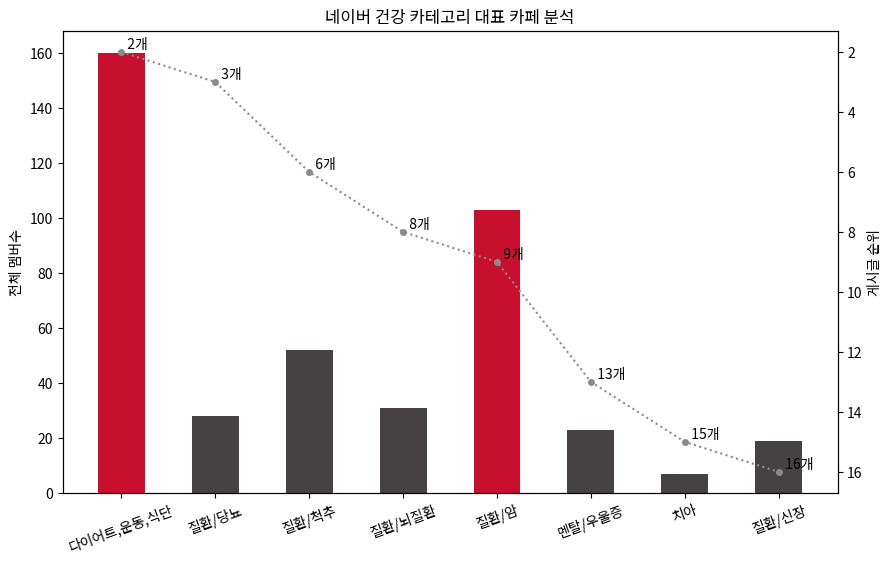

In [9]:
ceragem_red = '#C8102E'
ceragem_gray = '#464142'
hanyang_gray = '#898C8E'

# plot setting
plt.figure(figsize=(10, 6))
plt.xticks(
        [r for r in range(len(chn_stat['주제']))], 
        chn_stat['주제'],
        rotation=20)


plt.title('네이버 건강 카테고리 대표 카페 분석')
plt.ylabel('전체 멤버수')

# barplot
X = chn_stat['멤버수(만명)_sum']

bar_width = 0.5
r1 = np.arange(len(chn_stat['주제']))
r2 = [x + bar_width for x in r1]

plt.bar(r1,
        X,
        color=ceragem_gray,
        width=bar_width)

index_list = X.nlargest(2).index

for i in index_list:
        plt.bar(r1[i], X[i],
                color=ceragem_red, 
                width=bar_width)

# scatter
ax = plt.gca()
ax2 = ax.twinx()
ax2.invert_yaxis()
ax2.set_ylabel('게시글 순위')

Y = chn_stat['게시글 순위_min']
plt.plot(r1,Y,color=hanyang_gray,linestyle=':',markersize=4,marker='o')
for i in range(len(r1)):
    ax2.text(r1[i], Y[i], f'  {Y[i]}개', fontsize=10, ha='left', va='bottom')

In [21]:
chn_stat['게시글 순위_min']

0     2
1     3
2     6
3     8
4     9
5    13
6    15
7    16
8    37
9    45
Name: 게시글 순위_min, dtype: int64

## Topic 분석

In [33]:
topic = pd.read_csv('./topic.csv')
topic = topic.iloc[1:]
topic = topic.sort_values('사이즈', ascending=False)

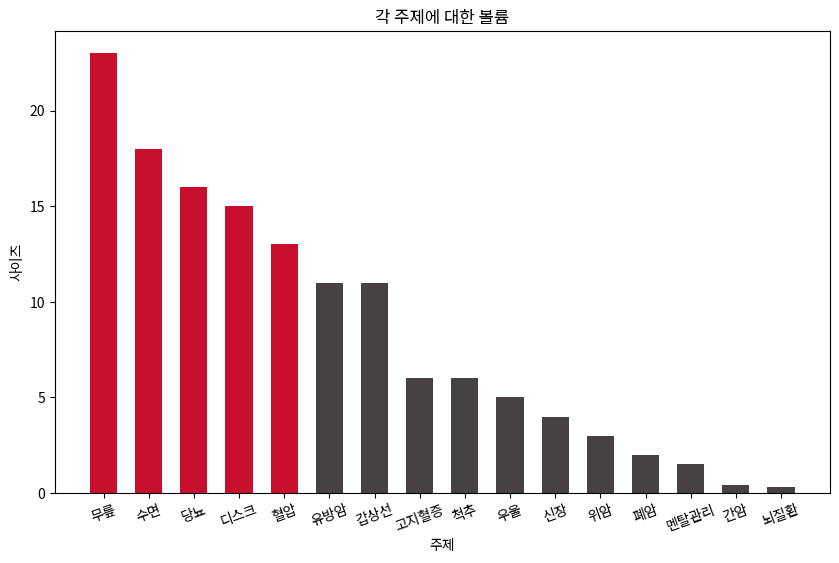

In [35]:
ceragem_red = '#C8102E'
ceragem_gray = '#464142'
hanyang_gray = '#898C8E'


plt.figure(figsize=(10, 6))

plt.xlabel('주제')
plt.ylabel('사이즈')
plt.title('각 주제에 대한 볼륨')

plt.xticks(
        [r for r in range(len(topic['주제']))], 
        topic['주제'],
        rotation=20)


X = topic['사이즈']

bar_width = 0.6
r1 = topic['주제']

plt.bar(r1,
        X,
        color=ceragem_gray,
        width=bar_width)

index_list = X.nlargest(5).index

for i in index_list:
        plt.bar(r1[i], X[i],
                color=ceragem_red, 
                width=bar_width)
